# Clean Energy Twitts Analysis

## Biomass 

Twitts on the topic of biomass clean energy are extracted and analyzed for their characteristics including counts, retwitts and likes to extract public opinion on this form of clean energy.

In [1]:
#Based off of this code: https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af
import snscrape.modules.twitter as sntwitter
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
stopwords_set = stopwords.words("English")
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ladan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
def tweet_extract (word_1, word_2, date_1, date_2):
    '''
    Extracting maximum 10000 twitts based on two topic words and a span of two dates 
    
    Parameters:
    -----------------------------
        word_1: string, topic word no 1
        word_2: string, topic word no 2
        date_1: string, start date with a string format 'yyyy-mm-dd'
        date_2: string, final date with a string format 'yyyy-mm-dd'
        
    Returns:
    -----------------------------
        a data frame with columns:
            Date     
            Tweet Id
            Text
            Username
            Location
            #Retweets
            #Replies
            #Likes
            #QuoteTweets
    '''
    tweets_list2 = []
    # Using TwitterSearchScraper to scrape data and append tweets to list
    # this is specifically looking for tweets with 'biomass', 'energy' between January 1, 2021 and March 31, 2021
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(word_1+ " " + word_2 + ' since:'+ date_1 + ' until:'+ date_2).get_items()):
        #only searching for 10000 tweets, but you can change this
        if i>10000:
            break
        #you'll get date, ID, content, username, location, num of retweets, likes, replies, and quote tweets
        tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.url, tweet.retweetCount, tweet.replyCount, tweet.likeCount, tweet.quoteCount])
        
    tweets_df2 = pd.DataFrame(tweets_list2, columns=['Date', 'Tweet Id', 'Text', 'Username', 'Location', '#Retweets', '#Replies', '#Likes', '#QuoteTweets'])    
    print(f"Total number of tweets are: {len(tweets_df2)}.")   
    return tweets_df2  

In [3]:
def frequent_twitters (df):
    frequency_df = df[['Username','Text']].groupby(['Username'])['Text'].count().nlargest(50)
    prob = df['Username'].value_counts(normalize=True)
    threshold = 0.02
    mask = prob > threshold
    tail_prob = prob.loc[~mask].sum()
    prob = prob.loc[mask]
    prob['other'] = tail_prob
    prob.plot(kind='bar')
    plt.xticks(rotation=25)
    plt.show()

In [7]:
def tweets_words_list (df):
    tweets_words = []
    for i in range (len(df)):
        tweets_temp_words = []
        tweets_temp_words=((df.loc[i,'Text']).split())
        #print(tweets_temp_words)
        for word in tweets_temp_words:
            tweets_words.append(word)
        #print(tweets_words) 
    return tweets_words

In [8]:
def corpus_info(corpus):
    counter = Counter(word.lower() for word in corpus)
    print("Vocabulary size:", len(counter))
    print("Most common words:", " ".join([pair[0] for pair in counter.most_common(10)]))
    print("Most common words excluding stopwords:", " ".join([pair[0] for pair in counter.most_common(500) if pair[0].isalpha() and pair[0].lower() not in stopwords_set][:10]))
    print("Wordcloud:")
    stopwords_set.extend(["would", "could", "one", "may", "https","co", "CO"])
    wordcloud = WordCloud(stopwords = stopwords_set).generate(" ".join(corpus))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()     

In [9]:
def tweet_analysis(word_1, word_2, date_1, date_2):    
    # Creating list to append tweet data to
    #tweets_list2 = []
    tweets_list3 = []
    tweet_df2 = tweet_extract(word_1, word_2, date_1, date_2)
    #print(f"Total number of tweets are: {len(tweet_df2)}.")
    my_corpus = tweets_words_list (tweet_df2)
    corpus_info(my_corpus)
    frequent_twitters(tweet_df2)
    df = tweet_df2[['Username','Text']].groupby(['Username'])['Text'].count().nlargest(50)
    user_id_1 = pd.DataFrame(df).reset_index()['Username'][0]
    user_id_2 = pd.DataFrame(df).reset_index()['Username'][1]
    user_id_3 = pd.DataFrame(df).reset_index()['Username'][2]
    print(f"{user_id_1},{user_id_2}, and {user_id_3} are the usernames with maximum number of twitts,respectively.")
    column_Retweets =tweet_df2["#Retweets"]
    max_index_retweets = column_Retweets.idxmax()
    print(f"The tweet: \n'{tweet_df2.iloc[max_index_retweets]['Text']}' \n by {tweet_df2.iloc[max_index_retweets]['Username']} got the maximum retweets of {tweet_df2.iloc[max_index_retweets]['#Retweets']} and {tweet_df2.iloc[max_index_retweets]['#Likes']} likes.")
    return tweet_df2

In [16]:
word_1 = 'biomass'
word_2 = 'energy'
date_1 =  '2018-01-01'
date_2 = '2021-08-01'

In [18]:
type(date_1)

str

Total number of tweets are: 8797.
Vocabulary size: 41429
Most common words: energy biomass the to and of in a is for
Most common words excluding stopwords: energy biomass carbon renewable wood power solar trees burning forest
Wordcloud:


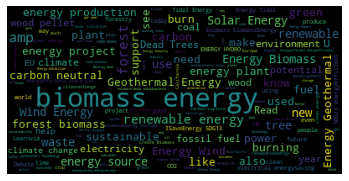

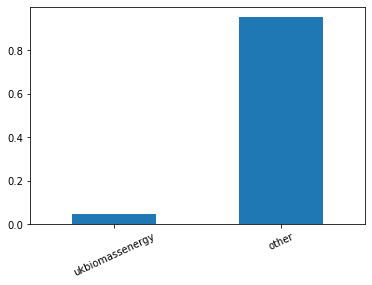

ukbiomassenergy,DorothySkrytek, and biomassconsult are the usernames with maximum number of twitts,respectively.
The tweet: 
'WIN a bottle of our latest featured gin - Goodwill Gin!
@glenwyvis is a pioneer of sustainable distilling, using clean and renewable wind, hydro, solar and biomass energy.
Read about it at https://t.co/ZXAKF6VWJm and comment to enter!
Over 18s only. Winner drawn 20/2.
Good luck! https://t.co/qB2CXknhNg' 
 by scottish_gin got the maximum retweets of 412 and 467 likes.


In [15]:
df_2018_2021 = tweet_analysis(word_1, word_2, date_1, date_2)

In [13]:
df_Nov_Dec_2018.head()

,Date,Tweet Id,Text,Username,Location,#Retweets,#Replies,#Likes,#QuoteTweets
0,2018-12-27 21:59:16+00:00,1078410007102795783,Biomass energy isn't a good option apparently....,AmerexEnergy,https://twitter.com/AmerexEnergy/status/107841...,0,0,0,0
1,2018-12-27 09:17:11+00:00,1078218224351748098,Biomass Energy Market Witness for Rapid Growth...,linkewire,https://twitter.com/linkewire/status/107821822...,0,0,0,0
2,2018-12-27 09:13:18+00:00,1078217244537171968,Biomass Energy in Upper Cound #Upper #Cound ht...,ukbiomassenergy,https://twitter.com/ukbiomassenergy/status/107...,0,0,0,0
3,2018-12-27 03:26:57+00:00,1078130083586588682,@TomatoesGrilled @foe_us Also-According to the...,twosimpleideas_,https://twitter.com/twosimpleideas_/status/107...,0,1,0,0
4,2018-12-25 21:13:16+00:00,1077673654908014592,Biomass Energy in Belfast #Belfast https://t.c...,ukbiomassenergy,https://twitter.com/ukbiomassenergy/status/107...,0,0,0,0
